In [1]:
import numpy as np
import pandas as pd


In [2]:
temp_df = pd.read_csv('IMDB Dataset.csv')


In [3]:
temp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB


In [4]:
df = temp_df.iloc[:10000]

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     10000 non-null  object
 1   sentiment  10000 non-null  object
dtypes: object(2)
memory usage: 156.4+ KB


In [6]:
df.head()


,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


<Axes: >

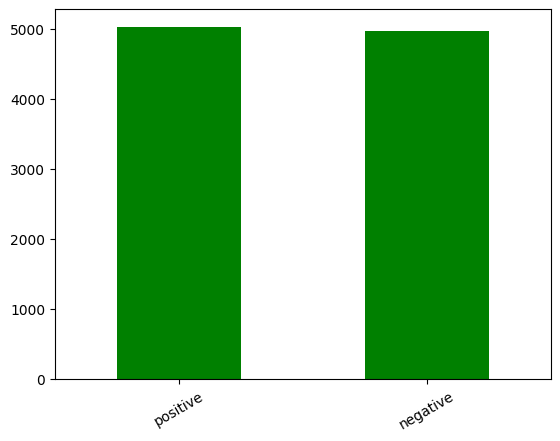

In [7]:
df['sentiment'].value_counts().plot.bar( rot=30, color="green", width=0.5)

In [18]:
df['review'][1]

'A wonderful little production. The filming technique is very unassuming- very old-time-BBC fashion and gives a comforting, and sometimes discomforting, sense of realism to the entire piece. The actors are extremely well chosen- Michael Sheen not only "has got all the polari" but he has all the voices down pat too! You can truly see the seamless editing guided by the references to Williams\' diary entries, not only is it well worth the watching but it is a terrificly written and performed piece. A masterful production about one of the great master\'s of comedy and his life. The realism really comes home with the little things: the fantasy of the guard which, rather than use the traditional \'dream\' techniques remains solid then disappears. It plays on our knowledge and our senses, particularly with the scenes concerning Orton and Halliwell and the sets (particularly of their flat with Halliwell\'s murals decorating every surface) are terribly well done.'

In [9]:
df['sentiment'].value_counts()

positive    5028
negative    4972
Name: sentiment, dtype: int64

In [10]:
df.isnull().sum()

review       0
sentiment    0
dtype: int64

In [11]:
df.duplicated().sum()

17

In [12]:
df.drop_duplicates(inplace=True)

<ipython-input-12-16cdb8520be8>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop_duplicates(inplace=True)


In [13]:
df.duplicated().sum()

0

# Basic Preprocessing
# Remove tags
# lowercase
# remove stopwords

In [14]:
import re
def remove_tags(raw_text):
    cleaned_text = re.sub(re.compile('<.*?>'), '', raw_text)
    return cleaned_text

In [15]:
df['review'] = df['review'].apply(remove_tags)

<ipython-input-15-00e93c2a3043>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['review'] = df['review'].apply(remove_tags)


In [16]:
df

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. The filming tec...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
...,...,...
9995,"Fun, entertaining movie about WWII German spy ...",positive
9996,Give me a break. How can anyone say that this ...,negative
9997,This movie is a bad movie. But after watching ...,negative
9998,This is a movie that was probably made to ente...,negative


In [19]:
df['review'] = df['review'].apply(lambda x:x.lower())

<ipython-input-19-afca29351ee0>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['review'] = df['review'].apply(lambda x:x.lower())


In [20]:
df['review'][1]

'a wonderful little production. the filming technique is very unassuming- very old-time-bbc fashion and gives a comforting, and sometimes discomforting, sense of realism to the entire piece. the actors are extremely well chosen- michael sheen not only "has got all the polari" but he has all the voices down pat too! you can truly see the seamless editing guided by the references to williams\' diary entries, not only is it well worth the watching but it is a terrificly written and performed piece. a masterful production about one of the great master\'s of comedy and his life. the realism really comes home with the little things: the fantasy of the guard which, rather than use the traditional \'dream\' techniques remains solid then disappears. it plays on our knowledge and our senses, particularly with the scenes concerning orton and halliwell and the sets (particularly of their flat with halliwell\'s murals decorating every surface) are terribly well done.'

In [21]:

import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [25]:
from nltk.corpus import stopwords

sw_list = stopwords.words('english')

df['review'] = df['review'].apply(lambda x: [item for item in x.split() if item not in sw_list]).apply(lambda x:" ".join(x))

<ipython-input-25-9f68b5950da1>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['review'] = df['review'].apply(lambda x: [item for item in x.split() if item not in sw_list]).apply(lambda x:" ".join(x))


In [23]:
df

,review,sentiment
0,one reviewers mentioned watching 1 oz episode ...,positive
1,wonderful little production. filming technique...,positive
2,thought wonderful way spend time hot summer we...,positive
3,basically there's family little boy (jake) thi...,negative
4,"petter mattei's ""love time money"" visually stu...",positive
...,...,...
9995,"fun, entertaining movie wwii german spy (julie...",positive
9996,"give break. anyone say ""good hockey movie""? kn...",negative
9997,movie bad movie. watching endless series bad h...,negative
9998,"movie probably made entertain middle school, e...",negative


In [24]:
df['review'][1]

'wonderful little production. filming technique unassuming- old-time-bbc fashion gives comforting, sometimes discomforting, sense realism entire piece. actors extremely well chosen- michael sheen "has got polari" voices pat too! truly see seamless editing guided references williams\' diary entries, well worth watching terrificly written performed piece. masterful production one great master\'s comedy life. realism really comes home little things: fantasy guard which, rather use traditional \'dream\' techniques remains solid disappears. plays knowledge senses, particularly scenes concerning orton halliwell sets (particularly flat halliwell\'s murals decorating every surface) terribly well done.'

In [26]:
X = df.iloc[:,0:1]
y = df['sentiment']

In [27]:
X

,review
0,one reviewers mentioned watching 1 oz episode ...
1,wonderful little production. filming technique...
2,thought wonderful way spend time hot summer we...
3,basically there's family little boy (jake) thi...
4,"petter mattei's ""love time money"" visually stu..."
...,...
9995,"fun, entertaining movie wwii german spy (julie..."
9996,"give break. anyone say ""good hockey movie""? kn..."
9997,movie bad movie. watching endless series bad h...
9998,"movie probably made entertain middle school, e..."


In [28]:
y

0       positive
1       positive
2       positive
3       negative
4       positive
          ...   
9995    positive
9996    negative
9997    negative
9998    negative
9999    positive
Name: sentiment, Length: 9983, dtype: object

In [29]:
import sklearn

In [30]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
y = encoder.fit_transform(y)

In [31]:
y

array([1, 1, 1, ..., 0, 0, 1])

In [32]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=1)

In [33]:
X_train.shape


(7986, 1)

In [34]:
X_test.shape

(1997, 1)

In [35]:
# Applying BoW
from sklearn.feature_extraction.text import CountVectorizer

In [36]:
cv = CountVectorizer()

In [37]:
X_train_bow = cv.fit_transform(X_train['review']).toarray()
X_test_bow = cv.transform(X_test['review']).toarray()

In [38]:
X_train_bow.shape

(7986, 48282)

In [39]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix

In [40]:
classifier = DecisionTreeClassifier()
classifier.fit(X_train_bow,y_train)

DecisionTreeClassifier()

In [41]:
y_pred = classifier.predict(X_test_bow)

In [42]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.70      0.70      0.70       952
           1       0.73      0.73      0.73      1045

    accuracy                           0.72      1997
   macro avg       0.72      0.72      0.72      1997
weighted avg       0.72      0.72      0.72      1997



In [43]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

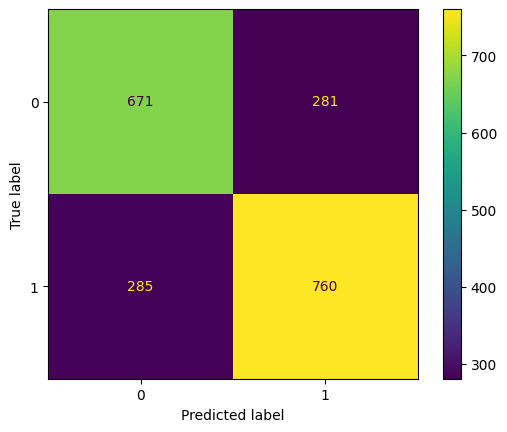

In [44]:
ConfusionMatrixDisplay.from_estimator( classifier, X_test_bow, y_test)
plt.show()

In [45]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()

gnb.fit(X_train_bow,y_train)

GaussianNB()

In [46]:
y_pred = gnb.predict(X_test_bow)

from sklearn.metrics import accuracy_score,confusion_matrix
accuracy_score(y_test,y_pred)

0.6324486730095142

In [47]:
print(confusion_matrix(y_test,y_pred))



[[717 235]
 [499 546]]


In [48]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.59      0.75      0.66       952
           1       0.70      0.52      0.60      1045

    accuracy                           0.63      1997
   macro avg       0.64      0.64      0.63      1997
weighted avg       0.65      0.63      0.63      1997



In [49]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()

rf.fit(X_train_bow,y_train)

0.8532799198798198

In [50]:
y_pred = rf.predict(X_test_bow)

In [51]:
accuracy_score(y_test,y_pred)

0.8532799198798198

In [52]:
cv = CountVectorizer(max_features=3000)
X_train_bow = cv.fit_transform(X_train['review']).toarray()
X_test_bow = cv.transform(X_test['review']).toarray()

rf = RandomForestClassifier()

rf.fit(X_train_bow,y_train)
y_pred = rf.predict(X_test_bow)
accuracy_score(y_test,y_pred)

0.8387581372058087

In [53]:
cv = CountVectorizer(ngram_range=(1,2),max_features=5000)
X_train_bow = cv.fit_transform(X_train['review']).toarray()
X_test_bow = cv.transform(X_test['review']).toarray()

rf = RandomForestClassifier()

rf.fit(X_train_bow,y_train)
y_pred = rf.predict(X_test_bow)
accuracy_score(y_test,y_pred)

0.8397596394591887


Using Tf-Idf

In [54]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [55]:
tfidf = TfidfVectorizer()

In [56]:
X_train_tfidf = tfidf.fit_transform(X_train['review']).toarray()
X_test_tfidf = tfidf.transform(X_test['review']).toarray()


In [57]:
rf = RandomForestClassifier()
rf.fit(X_train_tfidf,y_train)
y_pred = rf.predict(X_test_tfidf)
accuracy_score(y_test,y_pred)

0.8447671507260891

In [58]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()

In [59]:
new_review = 'I love this movie so much. It\'s really great'
new_review = re.sub('[^a-zA-Z]', ' ', new_review)
new_review = new_review.lower()
new_review = new_review.split()
ps = PorterStemmer()
all_stopwords = stopwords.words('english')
all_stopwords.remove('not')
new_review = [ps.stem(word) for word in new_review if not word in set(all_stopwords)]
new_review = ' '.join(new_review)


In [65]:
new_review = 'When The Swarm came out, The Sunday Times said it was, “simply the worst film ever made.” There were plenty of other critics who wrote about it, and they had nothing positive to say.'
new_review = re.sub('[^a-zA-Z]', ' ', new_review)
new_review = new_review.lower()
new_review = new_review.split()
ps = PorterStemmer()
all_stopwords = stopwords.words('english')
all_stopwords.remove('not')
new_review = [ps.stem(word) for word in new_review if not word in set(all_stopwords)]
new_review = ' '.join(new_review)

In [66]:
new_review

'swarm came sunday time said simpli worst film ever made plenti critic wrote noth posit say'

In [67]:
cv = CountVectorizer()
new_corpus = [new_review]
new_X_test = tfidf.transform(new_corpus)
new_y_pred = rf.predict(new_X_test)
print(new_y_pred)

[0]
